## Dscision Tree (의사결정나무)

데이터 분류 및 회귀에 사용되는 지도 학습 알고리즘 

장점 : 결과값이 어떻게 나왔는지 이해하기가 가장 쉽고 정확도가 높다.

딘점 : 과대 적합되기 쉽다.
***
의사결정 트리 알고리즘은 스무고개와 상당히 비슷하다. 데이터의 특징을 바탕으로 데이터를 연속적으로 분리하다 보면 결국 하나의 정답으로 데이터를 분류할 수 있는데 스무고개에서 적은 질문으로 정답을 맞추기 위해서는 의미 있는 질문을 먼저 하는 것이 중요하듯이 의사결정 트리에서도 의미 있는 질문을 먼저 하는 것이 상당히 중요하다. 데이터의 특징 속에서 분류에 큰 영향을 끼치는 특징을 발견하고 상위 노드로 선택하는 알고리즘이 의사결정 트리 알고리즘의 핵심이다.
***
스무고개를 할 때 질문자는 질문을 하나 던질 때마다 약간씩의 정보를 획득한다. 약간씩의 정보를 획득하는 과정은 정답에 대한 불확실성이 조금씩 줄어든다는 것과 같은 개념이다.

엔트로피(Entropy) : 정보 이론에서는 이 불확실성을 수치적으로 표현한 값이다.

정보 이득(Information gain): 질문 이전의 엔트로피에서 질문 후의 엔트로피를 뺀 값이된다. 즉 불확실성이 줄어든 정도를 정보 이득이라고 한다.
***
지니 계수(Gini Index)  
P^2 + Q^2 으로 계산하며 불순도를 측정하는 지표로 데이터의 통계적 분산정도를 정량화해서 표현한 것을 의미한다.  

사이킷런의 의사결정 트리는 CART(Classification And Regression Tree) 타입의 의사결정 트리이며 CART는 트리의 노드마다 특징을 이진 분류하는 특징이 있기에 사이킷런은 트리를 구성할 때 지니 계수를 사용한다.

### 0. 환경 설정

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
from sklearn import tree
from sklearn import preprocessing

### 1.문제 정의
서울 지역(구)의 경도와 위도 정보를 학습해서 임의로 입력된 지역(동)을 강동, 강서, 강남으로 분류하는 모델을 구현한다.

### 2. 데이터 획득
district : 구, dong : 동, latitude : 위도, longitude : 경도, label : 강동, 강서, 강남, 강북으로 구분한 지역

In [2]:
# 구 데이터 => 학습 데이터
district_dict_list = [
    {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
    {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
    {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
    {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
    {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},

    {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
    {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
    {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
    {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
    {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},

    {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
    {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
    {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
    {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
    {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},

    {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
    {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
    {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
    {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
    {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
 ]

In [3]:
# 동 데이터 => 테스트 데이터
dong_dict_list = [
    {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
    {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
    {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
    {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
    {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},

    {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
    {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
    {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
    {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
    {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},

    {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
    {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
    {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
    {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
    {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},

    {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
    {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
    {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
    {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
    {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
 ]

In [4]:
train_df = pd.DataFrame(district_dict_list)
test_df = pd.DataFrame(dong_dict_list)

In [5]:
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


### 3. 데이터 탐색
학습 데이터와 테스트 데이터의 레이블 분포를 확인한다.
-> 학습 데이터 레이블 : 4개 값으로 (강남, 강북, 강서, 강동) 5개씩 일정한 양으로 분포되어 있다.

In [6]:
print('train_df.label')
print(train_df.label.value_counts())

print('test_df.label')
print(test_df.label.value_counts())

train_df.label
Gangseo     5
Gangdong    5
Gangbuk     5
Gangnam     5
Name: label, dtype: int64
test_df.label
Gangseo     5
Gangdong    5
Gangbuk     5
Gangnam     5
Name: label, dtype: int64


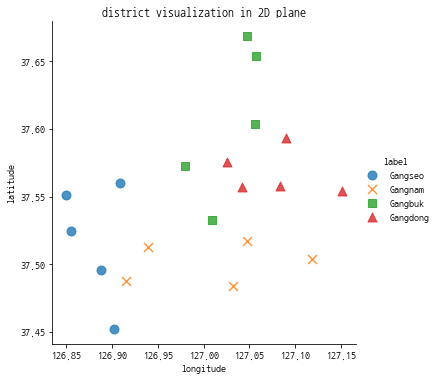

In [7]:
# scatter_kws : marker 사이즈 변환
# fit_reg=False : 회귀선이 안 보이게 함
sns.lmplot(x='longitude', y='latitude', data=train_df, 
           markers=['o', 'x', 's', '^'], hue='label', 
           scatter_kws={'s':80}, fit_reg=False)
plt.title('district visualization in 2D plane')
plt.show()

### 4. 데이터 정제
위의 시각화를 통해 구 이름과 동 이름이 학습이나 테스트에 별 영향을 미치기 않는다는 점을 알았으므로 학습 및 테스트에 필요없는 특징을 데이터에서 제거한다.

In [8]:
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [9]:
train_df.drop(['district'], axis=1, inplace=True)
train_df

,latitude,longitude,label
0,37.551000,126.849500,Gangseo
1,37.524240,126.855396,Gangseo
2,37.495400,126.887400,Gangseo
3,37.451900,126.902000,Gangseo
4,37.560229,126.908728,Gangseo
5,37.487517,126.915065,Gangnam
6,37.512400,126.939300,Gangnam
7,37.483700,127.032400,Gangnam
8,37.517200,127.047300,Gangnam
9,37.503510,127.117898,Gangnam


In [10]:
test_df.drop(['dong'], axis=1, inplace=True)
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [11]:
X_train = train_df[['longitude', 'latitude']]
Y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
Y_test = test_df[['label']]

### 5. 모델 학습
사이킷런의 의사결정 트리를 로드해서 학습한다.

#### 5.1. sklearn.preprocessing에 포함된 LabelEncoder는 데이터를 모델화시키고 학습을 시키기 위해서 숫자로 만든다.

In [12]:
Y_train

,label
0,Gangseo
1,Gangseo
2,Gangseo
3,Gangseo
4,Gangseo
5,Gangnam
6,Gangnam
7,Gangnam
8,Gangnam
9,Gangnam


In [13]:
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(Y_train)
print(y_encoded)
# 3 : Gangseo, 2: Gangnam, 1 : Gangbuk, 0 : Gangdong

[3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


#### 5.2.  DecisionTreeClassifier() 메소드로 의사결정 트리를 학습시킨다.

DecisionTree의 내부 알고리즘이 구동 시 random하게 특성들과 데이터 건수를 선택하는 로직이 포함되어 있기 때문에 random_state로 특정값을 지정하여 DecisionTree 수행시마다 동일한 Rule의 트리를 만들 수 있도록 한다.

In [14]:
# random_state 숫자는 아무거나 준다
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

#### 5.3. 학습된 의사결정 트리를 시각화하는 함수

In [15]:
def pprint(arr):
    print('type : {}'.format(type(arr)))
    print('shape : {}, dimension : {}, dtype : {}'.format(arr.shape, arr.ndim, arr.dtype))
    print('Array Data : \n', arr)

In [16]:
def display_decision_surface(clf, x, y):
    x_min = x.longitude.min() - 0.01
    x_max = x.longitude.max() + 0.01
    y_min = x.latitude.min() - 0.01
    y_max = x.latitude.max() + 0.01
    
    # classes_ : LabelEncoder()를 실행했을 때 숫자로 대체된 문자열 그룹의 개수
    n_classes = len(le.classes_)
    # print('le.classes_ : ', n_classes
    
    plot_color = 'rywb'
    plot_step = 0.001
    
    # meshgrid() : 좌표 벡터로 부터 좌표 행렬을 반환하여 축을 만든다
    # plot_step : 축 간격
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    # predict() : 학습 결과에 따라 예측을 한다.
    # np.c_[a,b] : 두 개의 1차원 배열을 컬럼으로 세로로 붙여서 2차원 배열을 만든다.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # pprint(Z)
    
    # 2차원 배열로 변경한다.
    Z = Z.reshape(xx.shape)
    # pprint(Z)
    
    # 등고선 차트
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_color):
        # print(i, color) # 0 r \n 1 y \n 2 w \n 3 b
        # np.where() : 조건에 맞는 값의 색인 위치를 찾는다.
        idx = np.where(y == i)
        # print(idx)
        plt.scatter(x.loc[idx].longitude, x.loc[idx].latitude,
                   c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu,
                   edgecolors='black', s=100)
    plt.title('Dscision surface of a decision tree', fontsize=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=15)
    plt.xlabel('longitude', fontsize=15)
    plt.ylabel('latitude', fontsize=15)
    plt.rcParams['figure.figsize'] = [10, 8]
    

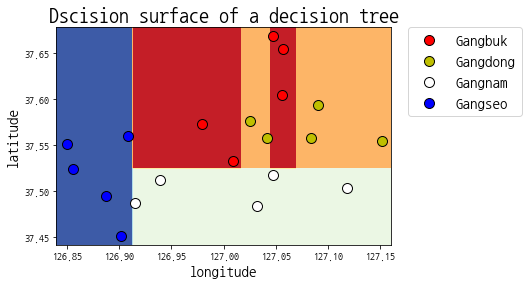

In [17]:
display_decision_surface(clf, X_train, y_encoded)

> 의사결정트리는 과대 적합되기가 상당히 쉬운 모델이다

> 사이킷런의 의사결정트리는 과대 적합을 피할 수 있도록 별도의 파라미터를 제공하는데 파라미터를 설정하지 않을 경우 모델은 학습되지만 과대 적합이 될 가능성이 높다

> 여기서는 아무런 파라미터의 설정 없이 학습 데이터를 학습한 의사결정트리의 결정 표면을 시각화해보았다. 위의 차트는 강북 사이에 강동에 해당되는 데이터들이  보이는 것으로 봐서 학습 데이터에만 너무 치우치게 학습됬다. 즉, 과대 적합 되었다고 판단할 수 있다.

#### 5.4. 과적합을 피라기 위해 피라미터를 설정한다.

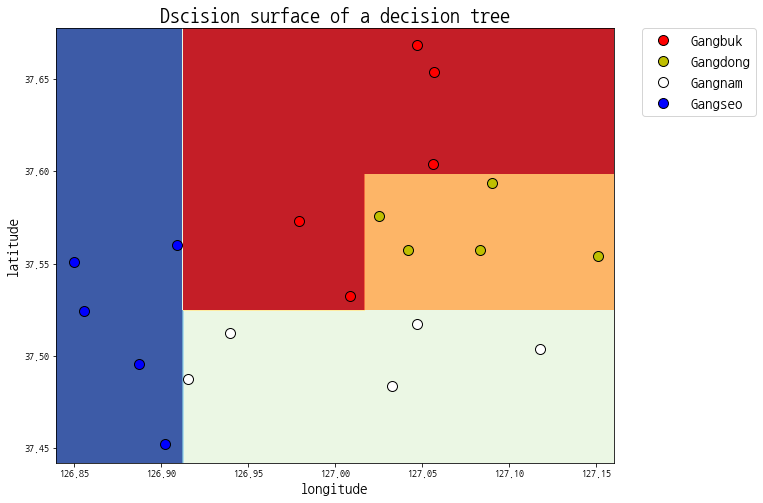

In [18]:
# max_depth : 트리의 최대 길이
# min_samples_split : 자식 노드를 가지기 위한 최소한의 데이터 갯수
# min_samples_leaf : 리프 노드의 최소 데이터 갯수
clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=2, 
                                 random_state = 70).fit(X_train, y_encoded)
display_decision_surface(clf, X_train, y_encoded)


### 6. 의사결정트리 시각화

1. graphviz 다운로드 후 실행시킨다.
        https://graphviz.org/download/  
        -> graphviz-3.0.0 (64-bit) EXE installer [sha256]
2. pip install graphviz
3. 시스템 환경변수에 'C:\Program Files\Graphviz\bin' 경로를 추가한다.

In [19]:
# !pip install graphviz

In [20]:
import graphviz

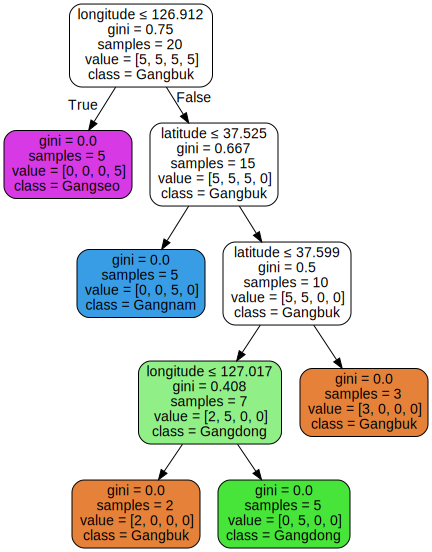

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['longitude', 'latitude'],
                                class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

# 랜더링된 의사경정트리를 pdf파일로 생성한다
# graph.render('seoul')
graph

### 7. 모델 테스트

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
pred = clf.predict(X_test) 
print('정확도 : ' + str(accuracy_score(Y_test.values.ravel(), le.classes_[pred])))


정확도 : 1.0


In [29]:
comparison = pd.DataFrame({'예측값' : le.classes_[pred], '실제값' : Y_test.values.ravel()})
comparison


,예측값,실제값
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam


In [30]:
# 정확도 예측 후 임의의 내용으로 테스트 데이터을 만든다.
dong_dict_list = [
    {'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
    {'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangname'},
    {'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
    {'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangdong'},
    {'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'}
]

test_df = pd.DataFrame(dong_dict_list)
X_test = test_df[['longitude', 'latitude']]
Y_test = test_df[['label']]

# 임의의 내용애 대한 학습을 시킨다.
pred = clf.predict(X_test) 
print('정확도 : ' + str(accuracy_score(Y_test.values.ravel(), le.classes_[pred])))

comparison = pd.DataFrame({'예측값' : le.classes_[pred], '실제값' : Y_test.values.ravel()})
comparison


정확도 : 0.6


,예측값,실제값
0,Gangseo,Gangseo
1,Gangseo,Gangname
2,Gangseo,Gangseo
3,Gangseo,Gangdong
4,Gangseo,Gangseo
